In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r'D:/data_science/Research/ground_truth_multi.csv')

In [3]:
x = df[['time','sender','messageID','pos__001','pos__002','pos__003','spd__001','spd__002']]
y = df.iloc[:,2:3].values

In [4]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

Using TensorFlow backend.
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [5]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
#Building Model
from sklearn.linear_model import SGDClassifier
reg = SGDClassifier(loss = 'modified_huber',random_state = 0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [8]:

#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.78%


[[   57    73   453  1929  4355  2399]
 [    0 10466     0     0     0     0]
 [    0     0 10389     0     0     0]
 [  218     0     0 10303     0     0]
 [   13     0     0  1017  6173  2603]
 [    3     0     0  1341  4982  3399]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'SGD')

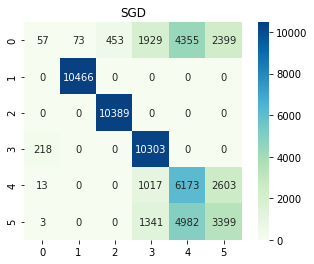

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('SGD')

In [10]:
from sklearn.metrics import classification_report
print('SGD')
print(classification_report(y_test, y_pred))


SGD
              precision    recall  f1-score   support

           0       0.20      0.01      0.01      9266
           1       0.99      1.00      1.00     10466
           2       0.96      1.00      0.98     10389
           4       0.71      0.98      0.82     10521
           8       0.40      0.63      0.49      9806
          16       0.40      0.35      0.38      9725

    accuracy                           0.68     60173
   macro avg       0.61      0.66      0.61     60173
weighted avg       0.62      0.68      0.63     60173

